# Load Datamine Data Locally

This workbook will demonstrate using the datamine package to source all your datamine data from CME Group and save it into local folders.

This is a working example for reference and is a starting point for more advanced use cases.  This workbook will demonstrate the following workflow
1. Credentialling into Datamine
2. Retrieving your data catalog of items
3. Downloading your data items to your local directories

This package does take some basic shortcuts to keep things simple.  They may be improved over time.  This includes
1. Package is not cacheing your data catalog locally.  It downloads the catalog each time; if you have a lot of data items (i.e. > 10,000 this may take some time.)
2. Package is always downloading all data from Datamine for a given data collection.  It will overwrite local copies of the data.  



In [1]:
import datamine.io as dm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#Establish an object to interact with CME Datamine.
#Supply Credentials per Documentation: http://www.cmegroup.com/market-data/datamine-api.html
myDatamine = dm.DatamineCon(username='', password='', path='./data/')

## Get Your Catalog Of Data

Datamine hosts all your subscriptions for download which you can see in the GUI.  https://datamine.cmegroup.com/

The following code will download a catalog of all your items.  We will turn that into a Pandas DataFrame to see what data we have in our account.


In [3]:
#Get the first 1,000 items for Crytocurrencies
myDatamine.get_catalog(dataset='CRYPTOCURRENCY', limit=1000)

get_catalog: retrieving CRYPTOCURRENCY, limit 1000
get_catalog: 30 records downloaded, 0 duplicates, 30 saved


In [4]:
# Review one of the data catalog items as supplied in dict format.  
myDatamine.data_catalog.popitem()

('20181202-CRYPTOCURRENCY',
 {'dataset': 'CRYPTOCURRENCY',
  'yyyymmdd': '20181202',
  'url': 'https://datamine.cmegroup.com/cme/api/v1/download?fid=20181202-CRYPTOCURRENCY',
  'fid': '20181202-CRYPTOCURRENCY',
  'orderid': '6792',
  'exchangecode': '*',
  'checksum': 'e5880963cb406183bfa0c2c55efd1036',
  'size': 3833185,
  'expiration': '2019-01-01',
  's3url': 'cmegroup-main-us-east-1-datamine-prod/bitcoin/20181202/20181202_btcIndexJson.gz'})

In [5]:
# We can view the data catalog easier in a Pandas Dataframe
dataCatalogDF = pd.DataFrame.from_dict(myDatamine.data_catalog,).T
dataCatalogDF.head()

,checksum,dataset,exchangecode,expiration,fid,orderid,s3url,size,url,yyyymmdd
20181231-CRYPTOCURRENCY,327660c7c1a0e2f2d3bcb795b626f205,CRYPTOCURRENCY,*,2019-01-30,20181231-CRYPTOCURRENCY,6792,cmegroup-main-us-east-1-datamine-prod/bitcoin/...,3770560,https://datamine.cmegroup.com/cme/api/v1/downl...,20181231
20181230-CRYPTOCURRENCY,81e5e1a0db352666e743a847cae16ef2,CRYPTOCURRENCY,*,2019-01-29,20181230-CRYPTOCURRENCY,6792,cmegroup-main-us-east-1-datamine-prod/bitcoin/...,3920966,https://datamine.cmegroup.com/cme/api/v1/downl...,20181230
20181229-CRYPTOCURRENCY,ebd5b06f41cedbed872cdc55903a5f75,CRYPTOCURRENCY,*,2019-01-28,20181229-CRYPTOCURRENCY,6792,cmegroup-main-us-east-1-datamine-prod/bitcoin/...,3801534,https://datamine.cmegroup.com/cme/api/v1/downl...,20181229
20181228-CRYPTOCURRENCY,53e0396cec119365266291d5edf79ab2,CRYPTOCURRENCY,*,2019-01-27,20181228-CRYPTOCURRENCY,6792,cmegroup-main-us-east-1-datamine-prod/bitcoin/...,3794378,https://datamine.cmegroup.com/cme/api/v1/downl...,20181228
20181227-CRYPTOCURRENCY,f367120f5d8d92d7cbe1f8ef9f898d43,CRYPTOCURRENCY,*,2019-01-26,20181227-CRYPTOCURRENCY,6792,cmegroup-main-us-east-1-datamine-prod/bitcoin/...,3807716,https://datamine.cmegroup.com/cme/api/v1/downl...,20181227


In [6]:
# We can see how many data products we can access
dataCatalogDF.dataset.value_counts()

CRYPTOCURRENCY    29
Name: dataset, dtype: int64

## Using The Data 

The following will show you example of how the Datamine python module can be used to copy down the data from the cloud to your local computer.  

This routine will download the data to the /data/* folder for each specific data set.  This routine copies everything down and overwrites anything locally.  This routine will take time depending upon the amount of data on the cloud that your trying to pull down.  The pulls are multithreaded to speed them up; you can adjust this by adjusting the processes in the MyDatamine object.

```myDatamine.processes = 4```

### Bitcoin & Crypto Currencies

In [7]:
# Load the bitcoin data from datamine cloud and structure into dataframe of myDatamine.bitcoin_DF.  
# Will return 0 if successful
myDatamine.crypto_load()

reading CRYPTOCURRENCY data: 100%|██████████| 29/29 [00:58<00:00,  1.19s/it]
concatenating 29 dataframes


In [8]:
#look at the data frame
myDatamine.crypto_DF.head()

,mdEntryCode,mdEntryPx,mdEntryTime,mdUpdateAction,netChgPrevDay,netPctChg,openCloseSettlFlag,rptSeq,symbol
mdEntryDateTime,,,,,,,,,
2018-12-16 00:00:00+00:00,NaN,3180.16,00:00:00.000,NEW,NaN,NaN,NaN,69618923,BRTI
2018-12-16 00:00:00+00:00,NaN,82.85,00:00:00.000,NEW,NaN,NaN,NaN,20312694,ETHUSD_RTI
2018-12-16 00:00:01+00:00,NaN,3180.14,00:00:01.000,NEW,NaN,NaN,NaN,69618924,BRTI
2018-12-16 00:00:01+00:00,NaN,82.85,00:00:01.000,NEW,NaN,NaN,NaN,20312695,ETHUSD_RTI
2018-12-16 00:00:02+00:00,NaN,82.85,00:00:02.000,NEW,NaN,NaN,NaN,20312696,ETHUSD_RTI


In [9]:
#There are many values in the file; 
#We are intesested in every second value as 'BRTI' and one daily index that is daily as 'BRR'
myDatamine.crypto_DF.symbol.value_counts()

BRTI          2504328
ETHUSD_RTI    2503978
ETHUSD_RR          29
BRR                29
Name: symbol, dtype: int64

### Bitcoin Real Time Index Rate

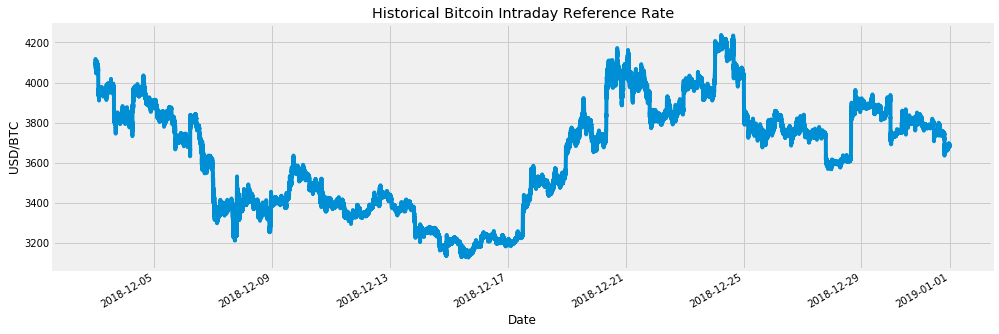

In [10]:
indexValue = myDatamine.crypto_DF.loc[myDatamine.crypto_DF['symbol'] =='BRTI','mdEntryPx'].plot(figsize=[15,5]);
plt.title('Historical Bitcoin Intraday Reference Rate')
plt.xlabel('Date')
plt.ylabel('USD/BTC')
plt.style.use('fivethirtyeight')
plt.savefig('./images/BitcoinRTIndexValue.png')
plt.show()

## Bitcoin End of Day Value




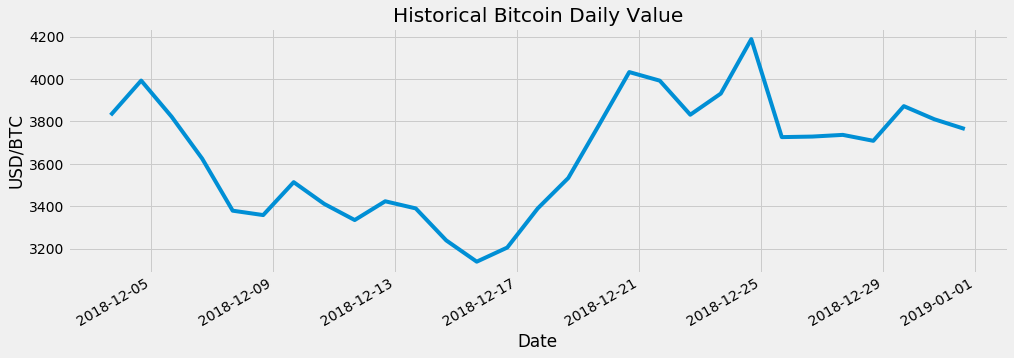

In [11]:
myDatamine.crypto_DF.loc[myDatamine.crypto_DF['symbol'] =='BRR','mdEntryPx'].plot(figsize=[15,5])
plt.title('Historical Bitcoin Daily Value')
plt.xlabel('Date')
plt.ylabel('USD/BTC')
plt.style.use('fivethirtyeight')
plt.savefig('./images/BitcoinEndofDayValue.png')
plt.show()

## Tick Data / Time and Sales

Tick data is considered Time and Sales.  This is data that represents the time that a specific product was traded between two parties at a given price.  The following will download the data local and load it into a Pandas DataFrame for analysis.

In [12]:
#update my catalog with Tick Data
myDatamine.get_catalog(dataset='TICK', limit=1000, refresh=True)

get_catalog: retrieving TICK, limit 1000
get_catalog: 59 records downloaded, 0 duplicates, 59 saved


In [13]:
#download and load my data
#Tick Data can be a lot of files and can take time to load into a Pandas Dataframe...
myDatamine.time_sales_load(False)

In [14]:
ts = myDatamine.time_sales_DF
ts.head()

,trade_date_time,trade_date,trade_time,trade_sequence_number,session_indicator,ticker_symbol,future_option_index_indicator,contract_delivery_date,trade_quantity,strike_price,...,close_open_type,valid_open_exception,post_close,cancel_code_type,insert_code_type,fast_late_indicator,cabinet_indicator,book_indicator,entry_date,exchange_code
0,2018-07-10 19:09:51+00:00,1970-01-01 00:00:00.020180710+00:00,19:09:51,3541,E,ED,F,1807,200,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180709,XCME
1,2018-07-10 19:09:51+00:00,1970-01-01 00:00:00.020180710+00:00,19:09:51,3546,E,ED,F,1807,0,0.0,...,O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180709,XCME
2,2018-07-10 01:00:20+00:00,1970-01-01 00:00:00.020180710+00:00,01:00:20,4041,E,ED,F,1807,500,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180710,XCME
3,2018-07-10 01:39:18+00:00,1970-01-01 00:00:00.020180710+00:00,01:39:18,4569,E,ED,F,1807,1000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180710,XCME
4,2018-07-10 01:44:07+00:00,1970-01-01 00:00:00.020180710+00:00,01:44:07,4583,E,ED,F,1807,5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20180710,XCME


In [15]:
#Review the Symbols we have loaded.  ED= Eurodollars
#See https://www.cmegroup.com/trading/products/#pageNumber=1&sortField=oi&sortAsc=false for product code and information
ts.ticker_symbol.value_counts()

ED    19829
Name: ticker_symbol, dtype: int64

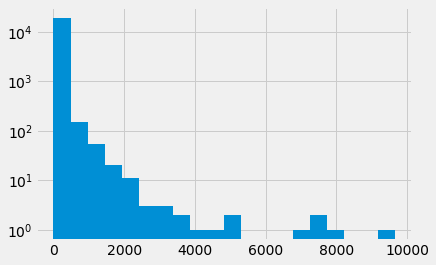

In [16]:
#Plot Histogram of lot size of a given trade for Euro Dollars Oil
ts.loc[ts.ticker_symbol =='ED','trade_quantity'].hist(bins=20).set_yscale('log')